# Bike Sharing prediction based on Poisson regression model 

# Importing Libraries 

In [3]:
import numpy as np # mathematical computation
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
from matplotlib import pyplot
import seaborn as sns # visualization
import warnings 
warnings.filterwarnings('ignore') #ignore warnings

#machine Learning models Libraries
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

#Preprocessing related Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#Date related Libraries
from datetime import date
#import holidays
import datetime


# Loading dataset 

In [166]:
dfday = pd.read_csv(r"E:\DS workspace\ML DL Python\aca tor dataset\bike sharing\day.csv")
dfday

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [98]:
dfday = dfday.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition','hum':'humidity','cnt':'total_count'})
#Type casting the datetime and numerical attributes to category

dfday['datetime']=pd.to_datetime(dfday.datetime)

dfday['season']=dfday.season.astype('category')
dfday['year']=dfday.year.astype('category')
dfday['month']=dfday.month.astype('category')
dfday['holiday']=dfday.holiday.astype('category')
dfday['weekday']=dfday.weekday.astype('category')
dfday['workingday']=dfday.workingday.astype('category')
dfday['weather_condition']=dfday.weather_condition.astype('category')

In [65]:
dfday['day']=dfday['datetime'].dt.day
dfday['day']=dfday.day.astype('category')
dfday["c"] = dfday["total_count"]
dfday = dfday.drop(columns={'total_count'})
dfday = dfday.rename(columns={'c':"total_count"})
dfday = dfday.drop(columns={'casual','registered'})

In [99]:
dfd1= dfday.copy()
dfd1

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [70]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [124]:
dfd1.iloc[:,-1]

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: total_count, Length: 731, dtype: int64

In [153]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dfd1.iloc[:,0:-3],dfd1[["total_count"]],test_size=0.3, random_state=42)

#Reset train index values
"""X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()"""

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(511, 13) (220, 13) (511, 1) (220, 1)
     total_count
223         4905
684         5445
685         5698
163         5020
394         3624
     total_count
703         6606
33          1550
300         3747
456         6041
633         7538


In [154]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed',]]
#Create a new dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [155]:
#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
223,8,5,0.415000,0.708333,0.125621,0,0,1,0,1,0,0,1,1,0,0,1,0
684,11,4,0.620417,0.321667,0.152987,0,0,0,1,1,0,0,1,0,1,0,0,1
685,11,5,0.524583,0.345000,0.171025,0,0,0,1,1,0,0,1,1,0,0,0,1
163,6,1,0.494583,0.635000,0.305350,0,1,0,0,1,0,0,1,1,0,0,1,0
394,1,1,0.400833,0.269167,0.215792,1,0,0,0,1,0,0,1,1,0,0,0,1


In [156]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.total_count.values

# Poisson regressor in GLM SKlearn

In [148]:
from sklearn import preprocessing,metrics,linear_model
#training model
pr_model=linear_model.PoissonRegressor()
#fit the trained model
pr_model.fit(X_train,y_train)
#Accuracy of the model
lr=pr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',pr_model.coef_)
print('Model intercept value :',pr_model.intercept_)

Accuracy of the model : 0.7915882766312219
Model coefficients : [-0.0040342   0.01360078 -0.16750722  1.22094264 -0.47299893 -0.34546131
  0.0169407  -0.07773169  0.15654494 -0.06628353 -0.18342384 -0.14385153
 -0.10585584  0.18193483  0.06365588 -0.49529809 -0.34941244  0.09970507]
Model intercept value : 8.153639337731612


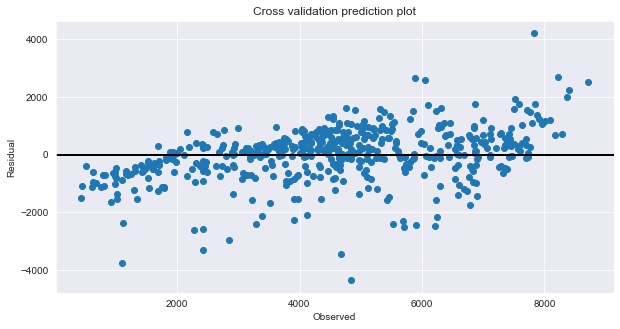

R-squared scores : 0.773656383434727
Shape of transformed dataframe : (220, 18)
Root mean square error : 809.3104057555228
Mean absolute error : 603.8106420688957


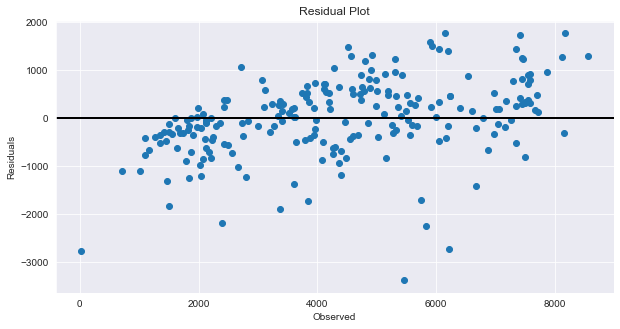

In [150]:
#Cross validation prediction
predict=cross_val_predict(pr_model,X_train,y_train,cv=3)
predict[:5]
#Cross validation plot
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()
#R-squared scores
r2_scores = cross_val_score(pr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values
#predict the model
lr_pred=pr_model.predict(X_test)
lr_pred
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

#Residual plot
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

# linear model

In [151]:
#training model
lr_model=linear_model.LinearRegression()
#fit the trained model
lr_model.fit(X_train,y_train)
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.8164644195384456
Model coefficients : [  -25.67964022    69.04524677  -946.11648038  5226.31938879
 -2526.83165381  -960.7979661    233.21695025   -71.46895155
   799.0499674    228.88041979  -228.88041979   -78.248613
    78.248613     791.45676629   269.60191415 -1061.05868044
  -991.62009894   991.62009894]
Model intercept value : 2138.0499819507813


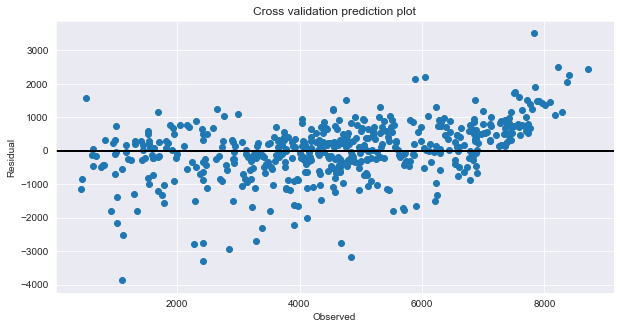

R-squared scores : 0.8001876665905119
Shape of transformed dataframe : (220, 18)
Root mean square error : 782.4072817767156
Mean absolute error : 594.5075464350738


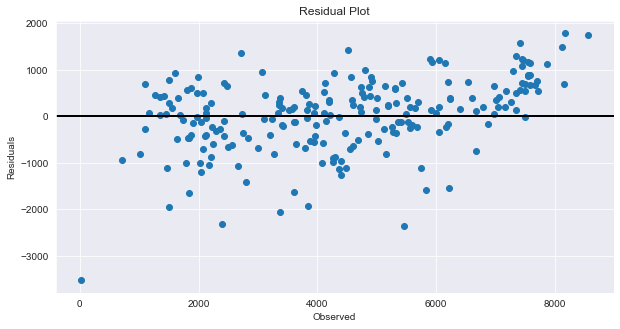

In [157]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict[:5]
#Cross validation plot
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values
#predict the model
lr_pred=lr_model.predict(X_test)
lr_pred
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

#Residual plot
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

# Decision Tree regressor

In [31]:
#training the model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [32]:
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [33]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.8082151777539757


In [35]:
#!pip install graphviz

In [159]:
#Plot the learned model
from sklearn import tree
import pydot
import graphviz

In [36]:
predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

array([4513.38554217, 4592.56521739, 4592.56521739, 4513.38554217,
       2558.6       , 5388.47058824, 6824.96969697, 4592.56521739,
       4592.56521739, 3603.92857143, 6824.96969697, 3194.22222222,
       4513.38554217, 6824.96969697, 4513.38554217, 6824.96969697,
       3603.92857143, 1636.81818182, 1636.81818182, 1636.81818182,
       6824.96969697, 2558.6       , 4592.56521739, 1027.        ,
       6824.96969697, 6824.96969697, 2558.6       , 4592.56521739,
       1636.81818182, 4513.38554217, 1636.81818182, 1636.81818182,
       1636.81818182, 1636.81818182, 4513.38554217, 5388.47058824,
       6824.96969697, 4592.56521739, 4513.38554217, 6824.96969697,
       6824.96969697, 4513.38554217, 6824.96969697, 6824.96969697,
       4513.38554217, 3194.22222222, 1636.81818182, 4592.56521739,
       4513.38554217, 6824.96969697, 3194.22222222, 6824.96969697,
       6824.96969697, 3603.92857143, 4513.38554217, 1027.        ,
       1636.81818182, 4513.38554217, 1636.81818182, 4513.38554

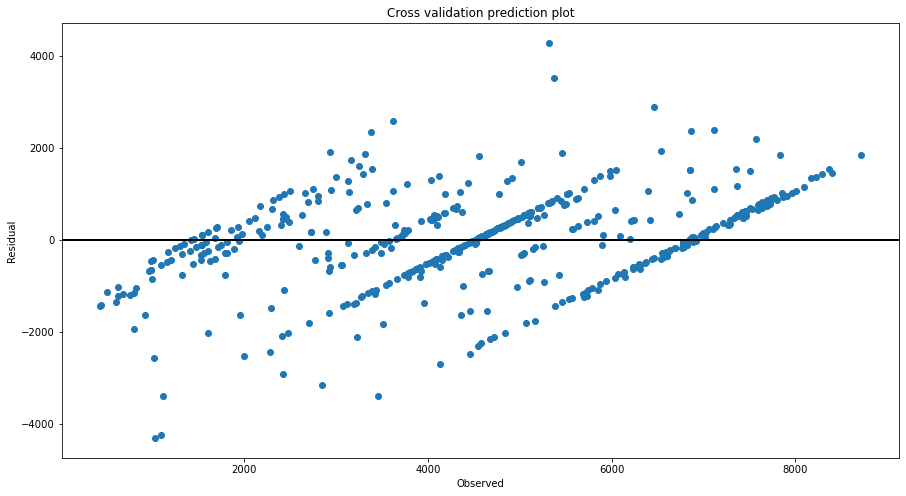

In [37]:
# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [38]:
#R-squared scores
r2_scores = cross_val_score(dtr, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7294133148789058


In [161]:
#accuracy of the model
rf_score =dtr.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.8082151777539757


In [39]:
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([6777.95      , 1848.95454545, 3612.69230769, 5277.09375   ,
       6777.95      , 6777.95      , 1848.95454545, 1992.25      ,
       6777.95      , 6777.95      , 1848.95454545, 1992.25      ,
       4465.04444444, 5277.09375   , 1992.25      , 1992.25      ,
       1992.25      , 6777.95      , 4465.04444444, 1848.95454545,
       6777.95      , 6777.95      , 5277.09375   , 1848.95454545,
       1992.25      , 4465.04444444, 1992.25      , 6777.95      ,
       1848.95454545, 5277.09375   , 1848.95454545, 4465.04444444,
       6777.95      , 6777.95      , 6777.95      , 5484.22727273,
       6777.95      , 6777.95      , 4465.04444444, 1848.95454545,
       4465.04444444, 1848.95454545, 6777.95      , 4465.04444444,
       6777.95      , 3612.69230769, 4465.04444444, 6777.95      ,
       6777.95      , 5484.22727273, 4465.04444444, 1848.95454545,
       1992.25      , 4465.04444444, 4465.04444444, 4465.04444444,
       3170.41666667, 4465.04444444, 4465.04444444, 6777.95   

In [40]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 925.7976022448886
Mean absolute error : 667.8169018859927


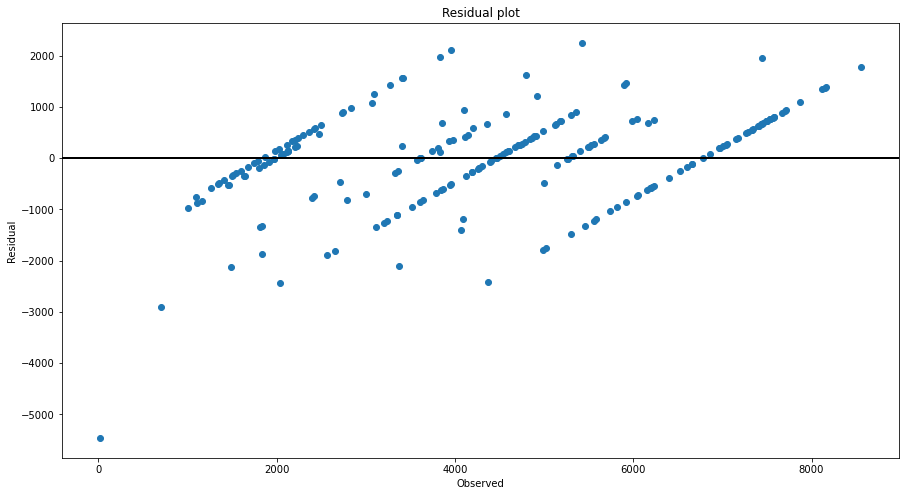

In [41]:
#Residual scatter plot
residuals = y_test-dtr_pred
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

In [43]:
dtr.score(X_train,y_train)

0.8082151777539757

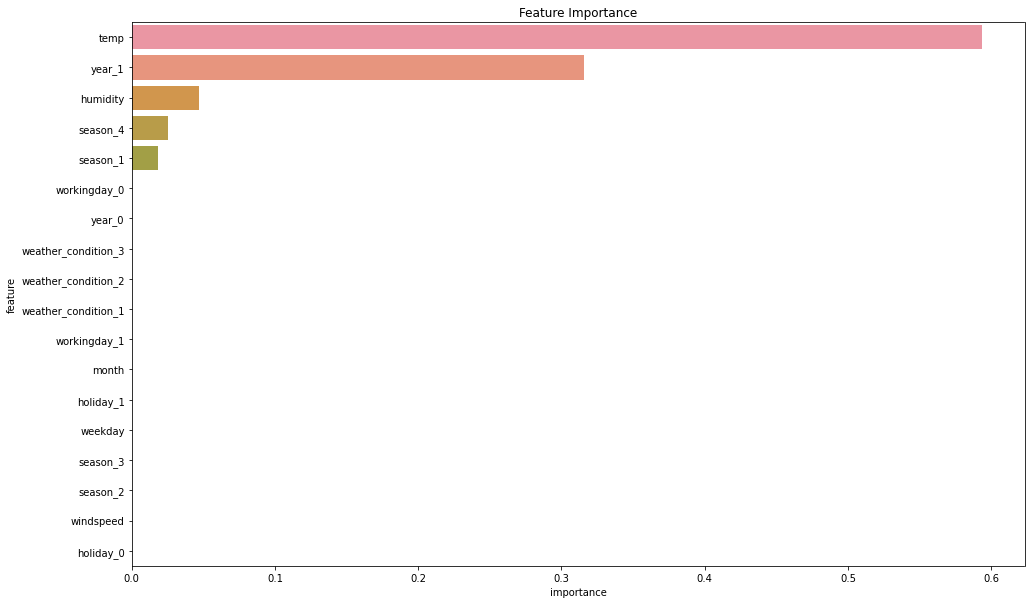

In [45]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dtr.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

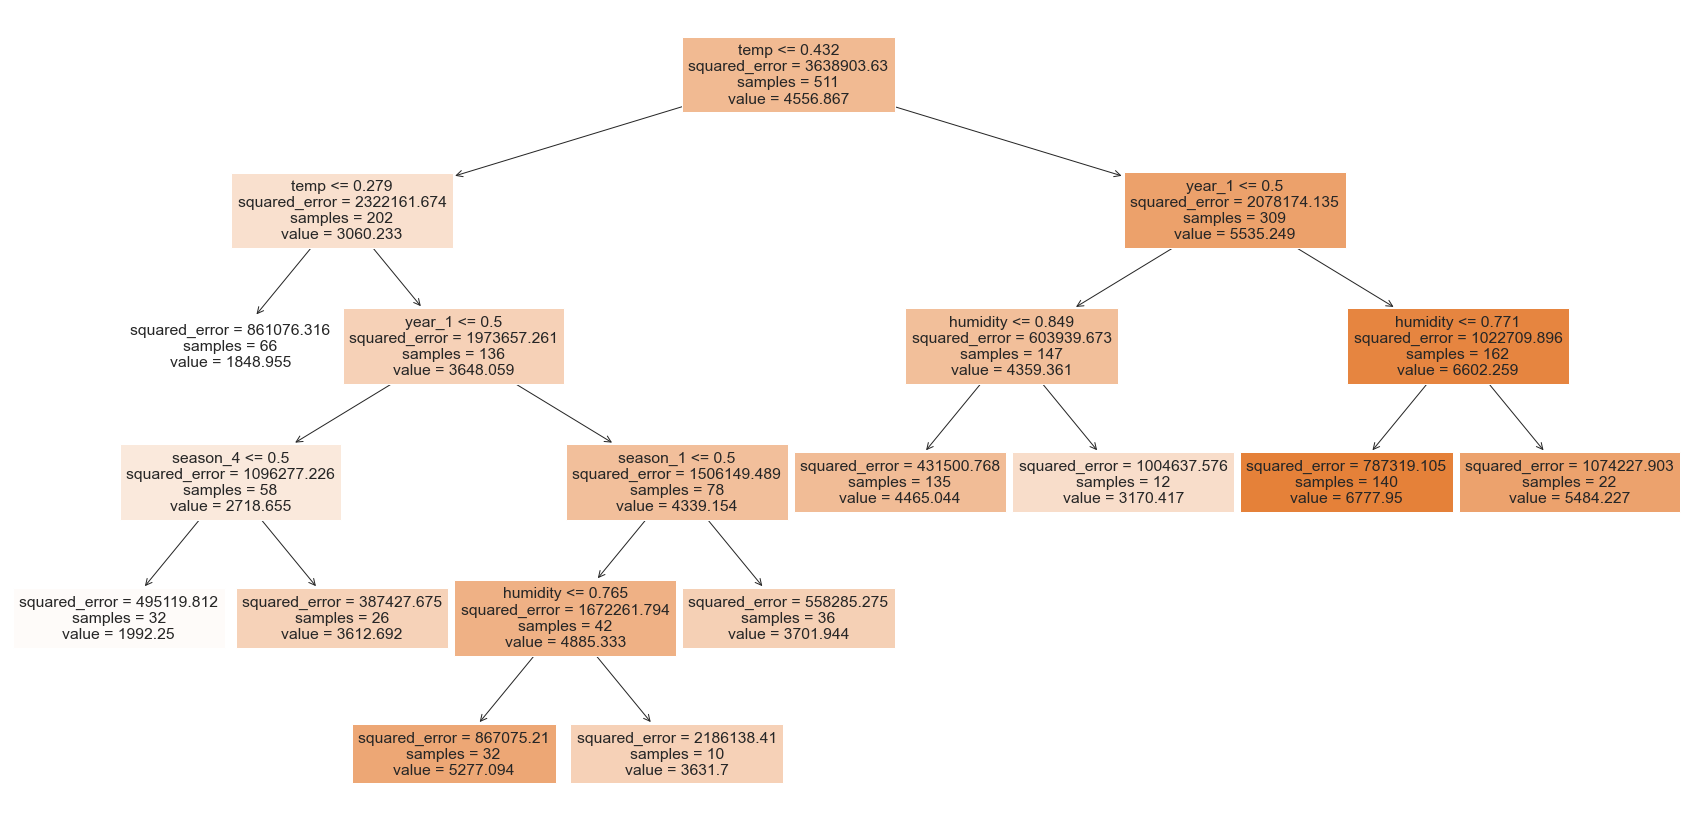

In [49]:
plt.figure(figsize=(30,15))
plot_tree(dtr, feature_names=X_train.columns, max_depth=10, filled=True);

# Random forest

In [168]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
rf=RandomForestRegressor(n_estimators=200)
#n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None

In [169]:
#Fit the trained model
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [170]:
#accuracy of the model
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9802724040602608


In [171]:
#Cross validation prediction
predict=cross_val_predict(rf,X_train,y_train,cv=3)
predict

array([4971.67 , 4717.045, 5288.615, 4765.26 , 2957.17 , 5631.25 ,
       6587.335, 3878.875, 4205.825, 3645.55 , 6002.16 , 3306.38 ,
       4268.325, 6873.   , 4906.025, 6640.845, 4061.62 , 2576.79 ,
       1133.74 , 1383.49 , 6279.47 , 3410.055, 4773.735, 4628.435,
       7159.49 , 6310.435, 3289.29 , 4153.875, 1397.66 , 4990.6  ,
        981.28 , 1873.43 , 1466.77 , 1922.155, 4731.665, 4807.775,
       6746.75 , 3939.21 , 4305.16 , 6051.905, 6541.415, 4333.005,
       7037.995, 6465.885, 4404.005, 3378.865, 1286.89 , 3949.68 ,
       4666.695, 6471.49 , 2841.07 , 6396.305, 6526.285, 3367.98 ,
       4932.89 , 3097.1  , 1407.915, 4182.14 , 1035.645, 4628.25 ,
       5593.975, 4133.865, 3549.915, 5454.055, 4461.195, 6856.02 ,
       4625.165, 3225.735, 3772.73 , 4233.06 , 3663.54 , 4438.205,
       7056.645, 3762.175, 4995.17 , 2405.015, 2481.34 , 4591.72 ,
       2243.35 , 4289.93 , 4340.25 , 4727.55 , 4188.51 , 2081.195,
       7476.175, 4322.   , 4715.36 , 7364.86 , 4603.465, 4206.

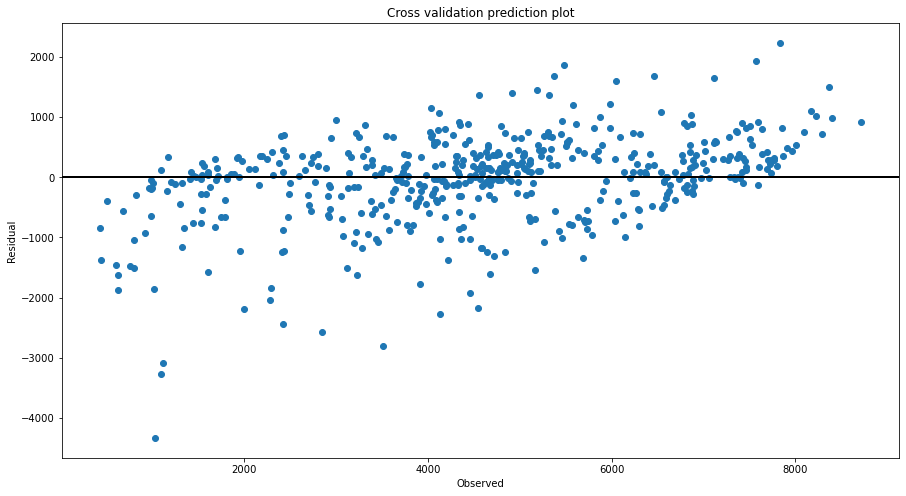

In [172]:
#Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [173]:
#R-squared scores
r2_scores = cross_val_score(rf, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8483028399085636


In [174]:
#predict the model
X_test=test_encoded_attributes
rf_pred=rf.predict(X_test)
rf_pred

array([6568.2  , 1534.435, 3364.375, 5251.095, 7513.55 , 7231.02 ,
       1495.74 , 2319.655, 7364.545, 6444.195, 2121.01 , 2931.81 ,
       4961.215, 4997.185, 2135.49 , 2021.125, 2256.705, 7857.495,
       4986.035, 2428.52 , 7450.45 , 6125.975, 5905.24 , 1824.68 ,
       1715.515, 4708.16 , 1915.885, 7196.885, 3215.07 , 5637.865,
       3001.89 , 4132.825, 6510.995, 7340.47 , 6271.48 , 5262.23 ,
       7260.9  , 6309.16 , 3189.56 ,  923.565, 3814.62 , 3370.38 ,
       7234.52 , 4426.95 , 6944.745, 2288.1  , 4367.575, 5674.35 ,
       6572.83 , 4296.47 , 4291.355, 2895.36 , 2328.13 , 4382.73 ,
       4640.135, 4228.025, 3552.925, 3775.915, 4229.34 , 6657.795,
       6206.99 , 6873.7  , 1948.895, 7330.425, 6551.385, 6400.22 ,
       5816.75 , 4369.39 , 1857.95 , 7407.525, 3611.9  , 1847.425,
       3298.005, 4001.96 , 4253.395, 3853.67 , 4626.415, 4509.145,
       1346.28 , 4353.18 , 2378.15 , 2042.235, 5033.705, 4210.965,
       3618.92 , 3405.985, 4165.105, 3683.55 , 3443.425, 3319.

In [175]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 636.9942340314535
Mean absolute error : 421.25518181818177


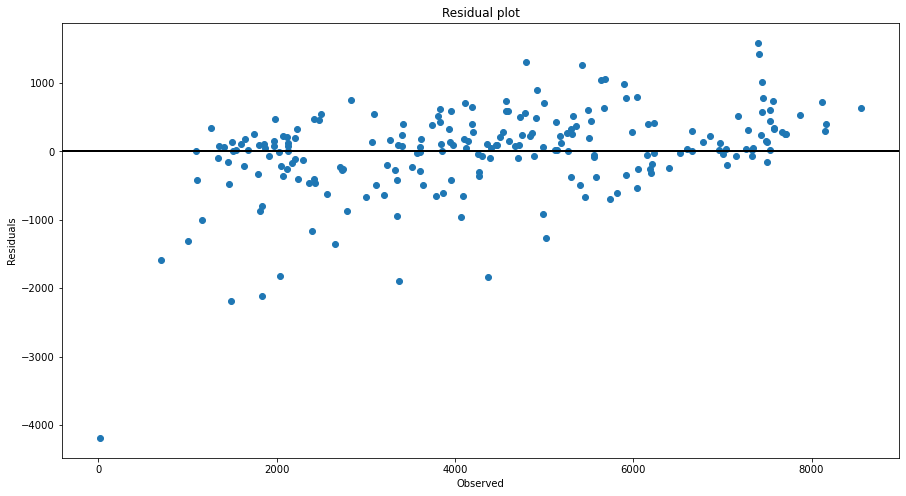

In [176]:
#Residual scatter plot
fig, ax = plt.subplots(figsize=(15,8))
residuals=y_test-rf_pred
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')

In [184]:
day_df1=pd.DataFrame(y_test,columns=['y_test'])
day_df2=pd.DataFrame(rf_pred,columns=['rf_pred'])
Bike_predictions=pd.merge(day_df1,day_df2,left_index=True,right_index=True)
Bike_predictions.to_csv('Bike_Renting_Python.csv')
Bike_predictions["diff"] = Bike_predictions["y_test"] -  Bike_predictions["rf_pred"]
Bike_predictions

,y_test,rf_pred,diff
0,6606,6568.200,37.800
1,1550,1534.435,15.565
2,3747,3364.375,382.625
3,6041,5251.095,789.905
4,7538,7513.550,24.450
...,...,...,...
215,2659,4015.990,-1356.990
216,7338,7290.460,47.540
217,6978,6857.530,120.470
218,4795,3488.315,1306.685


In [182]:
Bike_predictions["diff"] = Bike_predictions["y_test"] -  Bike_predictions["rf_pred"]

In [183]:
Bike_predictions

,y_test,rf_pred,diff
0,6606,6568.200,37.800
1,1550,1534.435,15.565
2,3747,3364.375,382.625
3,6041,5251.095,789.905
4,7538,7513.550,24.450
...,...,...,...
215,2659,4015.990,-1356.990
216,7338,7290.460,47.540
217,6978,6857.530,120.470
218,4795,3488.315,1306.685


In [2]:
#!pip install PrettyTable

Defaulting to user installation because normal site-packages is not writeable


In [165]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model" ,"Accuracy","R-squared scores","Root mean square error","Mean absolute error"]
x.add_row(["Poisson Regression",0.7915882766312219, 0.773656383434727, 809.3104057555228, 603.8106420688957])
x.add_row(["Linear Regression",0.8164644195384456, 0.8001876665905119, 782.4072817767156, 594.5075464350738])
x.add_row(["Decision Tree",0.8082151777539757, 0.7294133148789058, 925.7976022448886, 667.8169018859927])
x.add_row(["Random Forest Regression", 0.9802724040602608, 0.8483028399085636, 636.9942340314535,421.25518181818177])
x.add_row(["Poisson Regression SM",0, 0.5709161436367758, 0, 0])
x.add_row(["ARIMA Model", 0, 0, 733.81 ,0])

print(x)

+--------------------------+--------------------+---------------------+------------------------+---------------------+
|          Model           |      Accuracy      |   R-squared scores  | Root mean square error | Mean absolute error |
+--------------------------+--------------------+---------------------+------------------------+---------------------+
|    Poisson Regression    | 0.7915882766312219 |  0.773656383434727  |   809.3104057555228    |  603.8106420688957  |
|    Linear Regression     | 0.8164644195384456 |  0.8001876665905119 |   782.4072817767156    |  594.5075464350738  |
|      Decision Tree       | 0.8082151777539757 |  0.7294133148789058 |   925.7976022448886    |  667.8169018859927  |
| Random Forest Regression | 0.9802724040602608 |  0.8483028399085636 |   636.9942340314535    |  421.25518181818177 |
|  Poisson Regression SM   |         0          | -0.5709161436367758 |           0            |          0          |
|       ARIMA Model        |         0          

In [167]:
x1 = PrettyTable()
x1.field_names = ["Model" ,"Accuracy","R-squared scores","Root mean square error","Mean absolute error"]
x1.add_row(["Poisson Regression",0.79, 0.77, 809.31, 603.81])
x1.add_row(["Linear Regression",0.81, 0.80, 782.40, 594.50])
x1.add_row(["Decision Tree",0.80, 0.72, 925.79, 667.81])
x1.add_row(["Random Forest Regression", 0.98, 0.84, 636.99,421.25])
x1.add_row(["Poisson Regression SM",0, 0.57, 0, 0])
x1.add_row(["ARIMA Model", 0, 0, 733.81 ,0])
print(x1)

+--------------------------+----------+------------------+------------------------+---------------------+
|          Model           | Accuracy | R-squared scores | Root mean square error | Mean absolute error |
+--------------------------+----------+------------------+------------------------+---------------------+
|    Poisson Regression    |   0.79   |       0.77       |         809.31         |        603.81       |
|    Linear Regression     |   0.81   |       0.8        |         782.4          |        594.5        |
|      Decision Tree       |   0.8    |       0.72       |         925.79         |        667.81       |
| Random Forest Regression |   0.98   |       0.84       |         636.99         |        421.25       |
|  Poisson Regression SM   |    0     |       0.57       |           0            |          0          |
|       ARIMA Model        |    0     |        0         |         733.81         |          0          |
+--------------------------+----------+-------